<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [3]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-08-21 17:14:28--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  42.5MB/s    in 0.8s    

2024-08-21 17:14:30 (42.5 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [4]:
import pandas as pd

## Demo: How to run an sql query


In [6]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [8]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)

,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [10]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [11]:
query = """
SELECT OpenSource
FROM master
"""
df10 = pd.read_sql_query(query, conn)
df10

,OpenSource
0,The quality of OSS and closed source software ...
1,The quality of OSS and closed source software ...
2,"OSS is, on average, of HIGHER quality than pro..."
3,The quality of OSS and closed source software ...
4,The quality of OSS and closed source software ...
...,...
11393,"OSS is, on average, of HIGHER quality than pro..."
11394,The quality of OSS and closed source software ...
11395,The quality of OSS and closed source software ...
11396,"OSS is, on average, of LOWER quality than prop..."


In [11]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


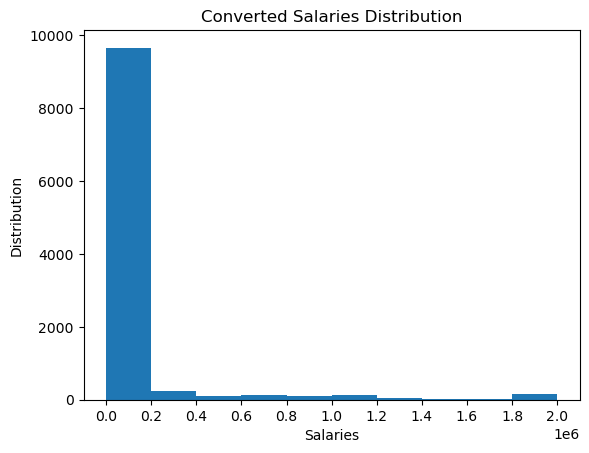

In [6]:
# your code goes here
import matplotlib.pyplot as plt
query = """
SELECT ConvertedComp 
FROM master
"""
df_concomp = pd.read_sql_query(query, conn)

fig=plt.hist(df_concomp, bins=10)
plt.title('Converted Salaries Distribution')
plt.xlabel('Salaries')
plt.ylabel('Distribution')
plt.xticks(fig[1])
plt.show()

### Box Plots


Plot a box plot of `Age.`


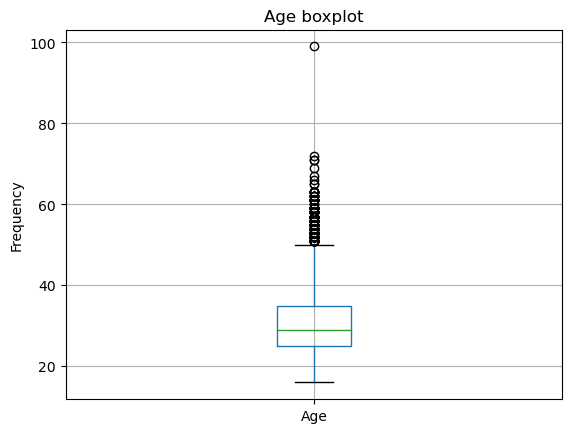

In [20]:
# your code goes here
query = """
SELECT Age
FROM master
"""
df_age = pd.read_sql_query(query, conn)
df_age.boxplot()
plt.title('Age boxplot')
plt.ylabel('Frequency')
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


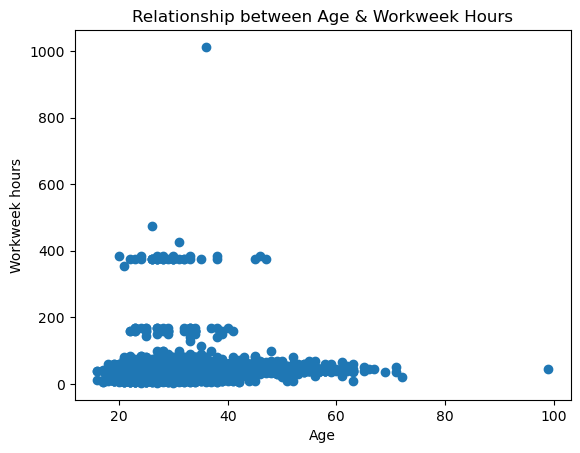

In [24]:
# your code goes here
query = """
SELECT Age, WorkWeekHrs
FROM master
"""
df1 = pd.read_sql_query(query, conn)
plt.scatter(x=df1['Age'],y=df1['WorkWeekHrs'])
plt.title('Relationship between Age & Workweek Hours')
plt.xlabel('Age')
plt.ylabel('Workweek hours')
plt.show()

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


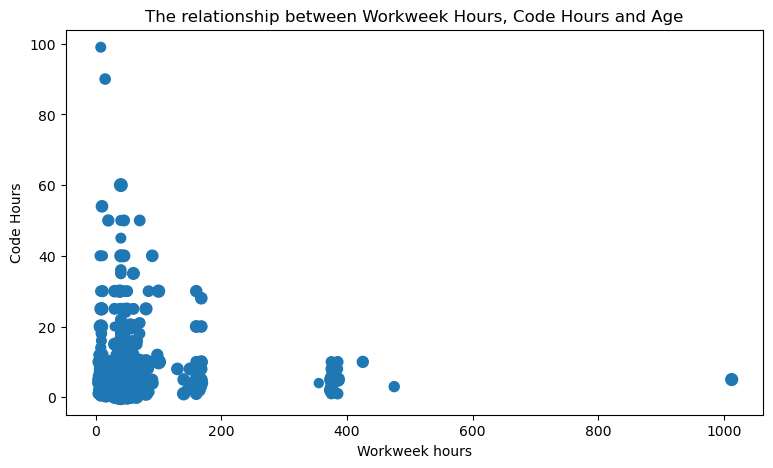

In [30]:
# your code goes here
query = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
"""
df2 = pd.read_sql_query(query, conn)
plt.figure(figsize=(9,5))
plt.scatter(x=df2['WorkWeekHrs'], y=df2['CodeRevHrs'],s=df2['Age']*2)
plt.title('The relationship between Workweek Hours, Code Hours and Age')
plt.xlabel('Workweek hours')
plt.ylabel('Code Hours')
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [94]:
query = """
SELECT sql FROM sqlite_master
where name= 'LanguageWorkedWith'
"""
df_ = pd.read_sql_query(query, conn)
print(df_.iat[0,0])

CREATE TABLE "LanguageWorkedWith" (
"Respondent" INTEGER,
  "LanguageWorkedWith" TEXT
)


In [95]:
query = """
SELECT LanguageWorkedWith, COUNT(*)
FROM LanguageWorkedWith
GROUP BY LanguageWorkedWith
ORDER BY COUNT(*) DESC
LIMIT 5
"""
df8 = pd.read_sql_query(query, conn)
df8

,LanguageWorkedWith,COUNT(*)
0,JavaScript,8687
1,HTML/CSS,7830
2,SQL,7106
3,Bash/Shell/PowerShell,4642
4,Python,4542


In [46]:
query = """
SELECT sql FROM sqlite_master
where name= 'DatabaseDesireNextYear'
"""
df_ = pd.read_sql_query(query, conn)
print(df_.iat[0,0])

CREATE TABLE "DatabaseDesireNextYear" (
"Respondent" INTEGER,
  "DatabaseDesireNextYear" TEXT
)


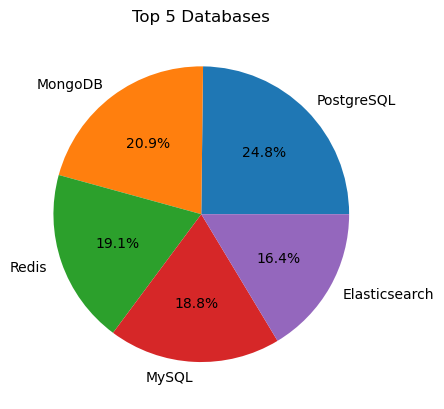

In [52]:
# your code goes here
query = """
SELECT DatabaseDesireNextYear, COUNT(*)
FROM DatabaseDesireNextYear
GROUP BY DatabaseDesireNextYear
ORDER BY COUNT(*) DESC
LIMIT 5
"""
df3 = pd.read_sql_query(query, conn)
labels = ['PostgreSQL','MongoDB','Redis','MySQL','Elasticsearch']
plt.pie(data=df3,x='COUNT(*)', labels=labels, autopct='%0.1f%%', pctdistance=0.6,labeldistance=1.1)
plt.title('Top 5 Databases')
plt.show()

In [97]:
query = """
SELECT sql FROM sqlite_master
where name= 'DatabaseWorkedWith'
"""
df_ = pd.read_sql_query(query, conn)
print(df_.iat[0,0])

CREATE TABLE "DatabaseWorkedWith" (
"Respondent" INTEGER,
  "DatabaseWorkedWith" TEXT
)


In [143]:
query = """
SELECT Respondent, COUNT(DatabaseWorkedWith)
FROM DatabaseWorkedWith
GROUP BY Respondent
HAVING COUNT(DatabaseWorkedWith)=1 AND MAX(DatabaseWorkedWith)="MySQL"
"""

df8 = pd.read_sql_query(query, conn)
Number_of_onlysql = len(df8)
Number_of_onlysql

474

In [101]:
query = """
SELECT DISTINCT 
FROM DatabaseWorkedWith
"""
df9 = pd.read_sql_query(query, conn)
df9

,Respondent,DatabaseWorkedWith
0,4,MySQL
1,4,SQLite
2,9,DynamoDB
3,9,PostgreSQL
4,9,SQLite
...,...,...
31370,25137,MySQL
31371,25138,PostgreSQL
31372,25141,Microsoft SQL Server
31373,25141,Redis


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


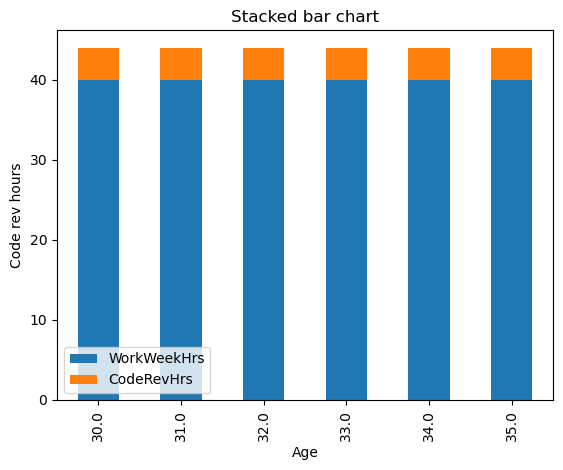

In [59]:
# your code goes here
query = """
SELECT WorkWeekHrs, CodeRevHrs, Age
FROM master
WHERE Age BETWEEN 30 AND 35
"""
df4 = pd.read_sql_query(query, conn)
group_median = df4.groupby(['Age']).median()
group_median.plot(kind='bar', stacked=True)
plt.title('Stacked bar chart')
plt.ylabel('Code rev hours')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


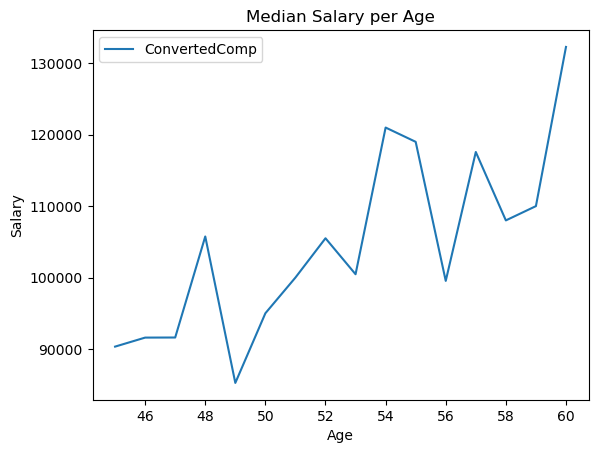

In [64]:
# your code goes here
query = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 45 AND 60
"""
df5 = pd.read_sql_query(query, conn)
group_median = df5.groupby('Age').median()
group_median.plot(kind='line')
plt.title('Median Salary per Age')
plt.ylabel('Salary')
plt.show()

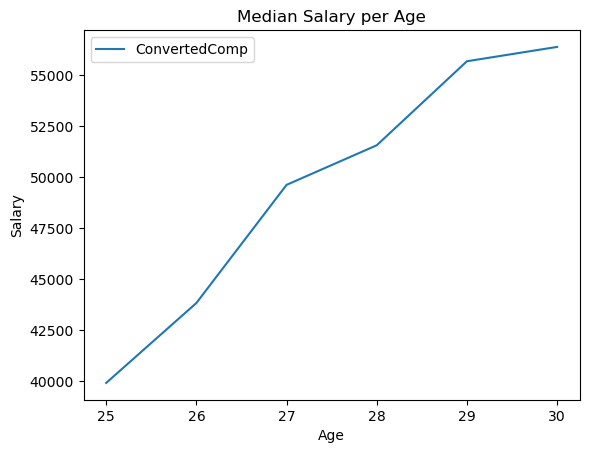

In [7]:
query = """
SELECT ConvertedComp, Age
FROM master
WHERE Age BETWEEN 25 AND 30
"""
df5 = pd.read_sql_query(query, conn)
group_median = df5.groupby('Age').median()
group_median.plot(kind='line')
plt.title('Median Salary per Age')
plt.ylabel('Salary')
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


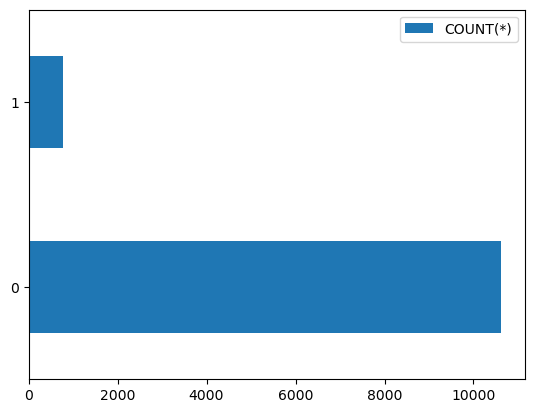

In [88]:
# your code goes here
query = """
SELECT MainBranch, COUNT(*)
FROM master
GROUP BY MainBranch
"""
df6 = pd.read_sql_query(query, conn)
df6.plot(kind='barh',y='COUNT(*)')
plt.show()

Close the database connection.


In [89]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
